ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [7]:
!pip install pandas openpyxl


     |████████████████████████████████| 249 kB 889 kB/s            
You should consider upgrading via the '/Users/taliyas/PycharmProjects/NER/venv/bin/python -m pip install --upgrade pip' command.


In [232]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('GPTClassification.csv')
data.shape

(364, 2)

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  364 non-null    object
 1   category  362 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [234]:
data.head(10)

,Sentence,category
0,"""I think there should be many various sitting ...",Land use
1,"""It should be distinctive but still matching t...",Local identity
2,"""It should be clear where the entrance is and ...",Land use
3,"""well I think that the spaces should be focuse...","Land use, Future of work"
4,"""well it could be achieved through different m...",Land use
5,"""yes, the current building, as unsuitable as i...",Local identity
6,"""maybe, however Im interested in your suggesti...",other
7,"""i find that a very correct approach... how di...",other
8,"""correct again """,other
9,"""well maybe it is a possibility to experiment ...",Local identity


In [235]:
empty_string_count = (data['category'] == 'other').sum()
print(empty_string_count)

93


In [236]:
data = data.dropna()

In [36]:
!pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/taliyas/PycharmProjects/NER/venv/lib/python3.9/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: tensorflow-text


In [39]:
!pip install keras

Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /Users/taliyas/PycharmProjects/NER/venv/lib/python3.9/site-packages
Requires: 
Required-by: tensorflow


In [237]:
total_duplicate_titles = sum(data["Sentence"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

There are 14 duplicate titles.


In [238]:
# Create a boolean mask for duplicated sentences
mask = data["Sentence"].duplicated(keep=False)

# Print the rows with duplicated sentences
print(data[mask])


                                     Sentence   
17                                       "no"  \
51   "What spaces should be in the building?"   
54     "What should the building look like? "   
71   "What spaces should be in the building?"   
74     "What should the building look like? "   
85                                  "Hi Zaha"   
97              "What would you like to know"   
123                                  "spaces"   
127                             "trees grass"   
129                                  "spaces"   
130                                 "history"   
131                                 "history"   
132                                  "spaces"   
133                             "trees grass"   
134                                  "modern"   
135                                 "history"   
139                            "not too high"   
142                                    "safe"   
144                                    "safe"   
169             "Wha

In [239]:
data = data[~data["Sentence"].duplicated()]
print(f"There are {len(data)} rows in the deduplicated dataset.")

# There are some categories with occurrence as low as 1.
print("categories upon once only:",sum(data["category"].value_counts() == 1))

# How many unique terms?
print("unique categories:",data["category"].nunique())

There are 348 rows in the deduplicated dataset.
categories upon once only: 14
unique categories: 31


In [240]:
# Get the categories that appear only once
single_occurrence_categories = data['category'].value_counts()
single_occurrence_categories = single_occurrence_categories[single_occurrence_categories == 1].index

# Print the rows where 'category' is in the list of single-occurrence categories
once_sen = data[data['category'].isin(single_occurrence_categories)]
print(once_sen)

                                              Sentence   
15   "hi, i think if there´s more free use co-worki...  \
19   "The building should be more open for the soci...   
22   "To have a cafe on the ground floor would be n...   
53                             "Can we have a garden?"   
110  "I agree! Architecture students should be insp...   
145  "The building should have several spaces for g...   
183       "Can I 3d print infra lightweight concrete?"   
194  "I think it should be more inviting compared t...   
198  "There should be greenery aroud the building, ...   
226  "I think that a good architecture school shoul...   
239  "Hello Zaha, nice to meet you! I'm glad to be ...   
316  "I hope in office room or big classroom there ...   
325  "it should be 3-4 floors in height and have bo...   
335  "Who's your favorite architect what's your fav...   

                                              category  
15   Local identity, Environment and climate resili...  
19   Local iden

In [241]:
# Replace "and" and ";" with ","
data['category'] = data['category'].str.replace(' and ', ', ')
data['category'] = data['category'].str.replace(';', ',')


In [242]:
data["category"] = data["category"].apply(
    lambda x: x.split(', ')
)
data["category"].values[:5]


array([list(['Land use']), list(['Local identity']), list(['Land use']),
       list(['Land use', 'Future of work']), list(['Land use'])],
      dtype=object)

In [243]:
# Create a list to store the new rows
new_rows = []

# Iterate over the rows in the dataframe where category is in single_occurrence_categories
for idx, row in once_sen.iterrows():
    # Iterate over the categories in the 'category' column
    for cat in row['category']:
        new_row = {'Sentence': row['Sentence'], 'category': [cat]}
        # Only add the new row if it is not already in new_rows
        if new_row not in new_rows:
            new_rows.append(new_row)
    data = data.drop(idx)

# Create a new DataFrame from the new rows
new_rows_df = pd.DataFrame(new_rows)

# Append the new rows to the dataframe using concat
data = pd.concat([data, new_rows_df], ignore_index=True)


In [244]:
# Convert lists in 'category' to tuples
new_rows_df['category'] = new_rows_df['category'].apply(tuple)

# Then check for duplicates
total_duplicate_titles = new_rows_df.duplicated().sum()
print(f"There are {total_duplicate_titles} duplicates.")



There are 0 duplicates.


In [248]:
# There are some categories with occurrence as low as 1.
print(once_sen['Sentence'][19])
print(data[data['Sentence'] == once_sen['Sentence'][19]])

"The building should be more open for the society."
                                              Sentence category
357  "The building should be more open for the soci...      [L]
358  "The building should be more open for the soci...      [o]
359  "The building should be more open for the soci...      [c]
360  "The building should be more open for the soci...      [a]
361  "The building should be more open for the soci...      [l]
362  "The building should be more open for the soci...      [ ]
363  "The building should be more open for the soci...      [i]
364  "The building should be more open for the soci...      [d]
365  "The building should be more open for the soci...      [e]
366  "The building should be more open for the soci...      [n]
367  "The building should be more open for the soci...      [t]
368  "The building should be more open for the soci...      [y]
369  "The building should be more open for the soci...      [,]
370  "The building should be more open for the soci.

In [99]:
# # Get the categories that appear more than once
# multi_occurrence_categories = data['category'].value_counts()
# multi_occurrence_categories = multi_occurrence_categories[multi_occurrence_categories > 1].index
#
# # Filter the data to only include rows where 'category' is in the list of multi-occurrence categories
# data = data[data['category'].isin(multi_occurrence_categories)]


In [247]:
test_split = 0.1

# Initial train and test split.
train_df, test_df = train_test_split(
    data,
    test_size=test_split,
    stratify=data["category"].values,
)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [103]:
import tensorflow as tf
categories = tf.ragged.constant(train_df["category"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(categories)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)


print("Vocabulary:\n")
print(vocab)

2023-05-14 14:02:46.286594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [305]
	 [[{{node Placeholder/_0}}]]


Vocabulary:

['[UNK]', 'Land use', 'other', 'climate resilience', 'Environment', 'Local identity', 'Future of work', 'Mobility (transport)']


In [106]:
sample_label = train_df["category"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['Environment', 'climate resilience']
Label-binarized representation: [[0. 0. 0. 1. 1. 0. 0. 0.]]


In [107]:
train_df["Sentence"].apply(lambda x: len(x.split(" "))).describe()


count    305.000000
mean      10.596721
std       12.903666
min        1.000000
25%        5.000000
50%        8.000000
75%       13.000000
max      136.000000
Name: Sentence, dtype: float64

In [115]:


# max_seqlen = 20
# batch_size = 128
# padding_token = "<pad>"
# auto = tf.data.AUTOTUNE
#
# # Tokenize categories
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data["category"])
# num_classes = len(tokenizer.word_index) + 1  # Plus one for padding
#
# def make_dataset(dataframe, is_train=True):
#     # Tokenize and binarize labels
#     labels = tokenizer.texts_to_sequences(dataframe["category"])
#     print("labels: ",labels)
#     label_binarized = tf.keras.preprocessing.sequence.pad_sequences(labels, padding='post')
#     print("label_binarized: ",label_binarized)
#     # Create dataset
#     dataset = tf.data.Dataset.from_tensor_slices(
#         (dataframe["Sentence"].values, label_binarized)
#     )
#     dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
#     return dataset.batch(batch_size)


In [123]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_seqlen = 20
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["category"].values)
    print("labels: ",labels)
    label_binarized = lookup(labels).numpy()
    print("label_binarized: ",label_binarized)
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["Sentence"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [124]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

labels:  <tf.RaggedTensor [[b'Environment', b'climate resilience'], [b'Land use'],
 [b'Future of work'], [b'Environment', b'climate resilience'],
 [b'Environment', b'climate resilience'], [b'Local identity'],
 [b'Land use'], [b'Environment', b'climate resilience', b'Local identity'],
 [b'Environment', b'climate resilience'], [b'Land use'], [b'other'],
 [b'other'], [b'Mobility (transport)', b'Land use'],
 [b'Environment', b'climate resilience'], [b'Land use', b'Future of work'],
 [b'other'], [b'Land use'], [b'Land use'],
 [b'Environment', b'climate resilience'], [b'Local identity'],
 [b'Environment', b'climate resilience'], [b'Land use'], [b'Land use'],
 [b'other'], [b'Land use'], [b'Environment', b'climate resilience'],
 [b'Local identity'], [b'Future of work'], [b'other'], [b'Land use'],
 [b'other'], [b'Land use'], [b'other'], [b'other'], [b'other'],
 [b'Future of work'], [b'Environment', b'climate resilience', b'Land use'],
 [b'other'], [b'Environment', b'climate resilience'], [b'Loc

In [125]:
import numpy as np
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'"I was wondering that the new school has big workshop and maybe some shops"'
Label(s): ['Land use' 'Future of work']
 
Abstract: b'"do you have suggestions for my ideas?"'
Label(s): ['other']
 
Abstract: b'"maybe looking into eco friendly materials "'
Label(s): ['climate resilience' 'Environment']
 
Abstract: b'"Hey, I would like a building with community space"'
Label(s): ['Land use']
 
Abstract: b'"I would include workstations fp"'
Label(s): ['Land use']
 


2023-05-14 15:13:34.966267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [305,8]
	 [[{{node Placeholder/_1}}]]
2023-05-14 15:13:34.967817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [305,8]
	 [[{{node Placeholder/_1}}]]


In [126]:
vocabulary = set()
train_df["Sentence"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

1085


In [128]:
from tensorflow.keras import layers
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=2, output_mode="tf_idf"
)

# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

2023-05-14 15:16:41.366500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [305]
	 [[{{node Placeholder/_0}}]]
2023-05-14 15:16:41.366955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [305,8]
	 [[{{node Placeholder/_1}}]]


Create a text classification Model

In [129]:
def make_model():
    shallow_mlp_model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(256, activation="relu"),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]  # More on why "sigmoid" has been used here in a moment.
    )
    return shallow_mlp_model

Train the model

Epoch 1/14
3/3 [==============================] - 2s 145ms/step - loss: 0.7095 - binary_accuracy: 0.5672 - precision: 0.1844 - recall: 0.4621 - f1_score: 0.2636 - val_loss: 0.4362 - val_binary_accuracy: 0.8382 - val_precision: 0.5000 - val_recall: 0.1364 - val_f1_score: 0.2143
Epoch 2/14
3/3 [==============================] - 0s 41ms/step - loss: 0.4769 - binary_accuracy: 0.8381 - precision: 0.6129 - recall: 0.0929 - f1_score: 0.1614 - val_loss: 0.4271 - val_binary_accuracy: 0.8162 - val_precision: 0.3846 - val_recall: 0.2273 - val_f1_score: 0.2857
Epoch 3/14
3/3 [==============================] - 0s 40ms/step - loss: 0.4049 - binary_accuracy: 0.8484 - precision: 0.6000 - recall: 0.2861 - f1_score: 0.3874 - val_loss: 0.3958 - val_binary_accuracy: 0.8309 - val_precision: 0.3333 - val_recall: 0.0455 - val_f1_score: 0.0800
Epoch 4/14
3/3 [==============================] - 0s 40ms/step - loss: 0.3272 - binary_accuracy: 0.8816 - precision: 0.9545 - recall: 0.3081 - f1_score: 0.4658 - val_lo

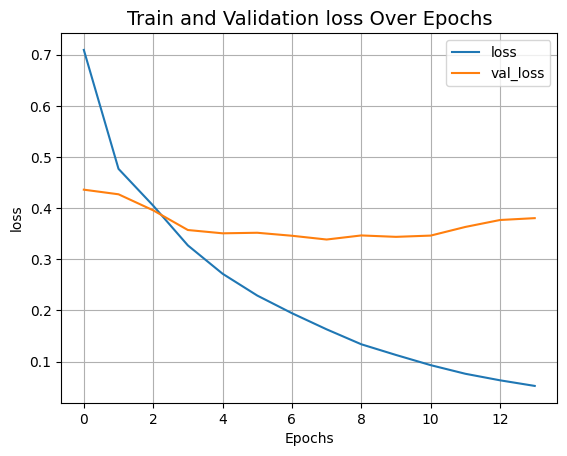

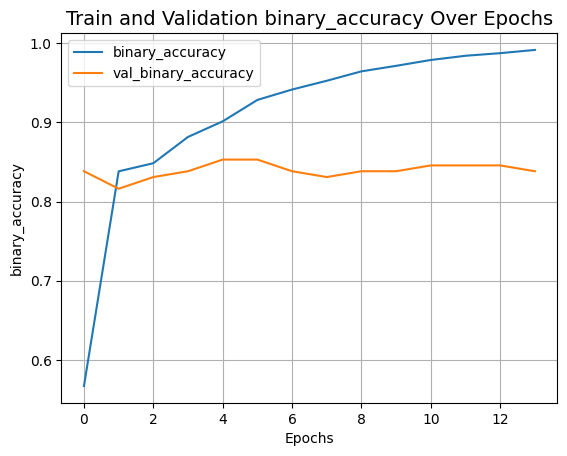

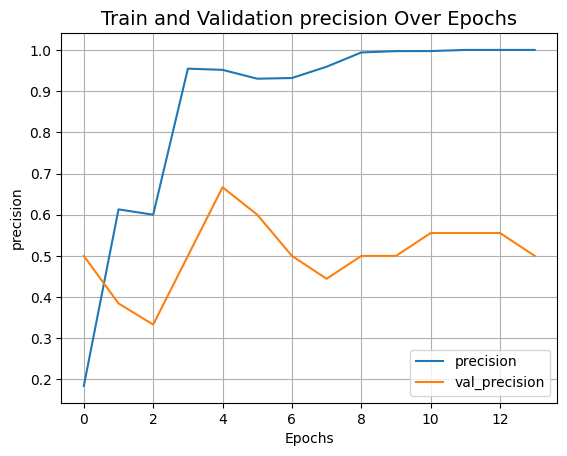

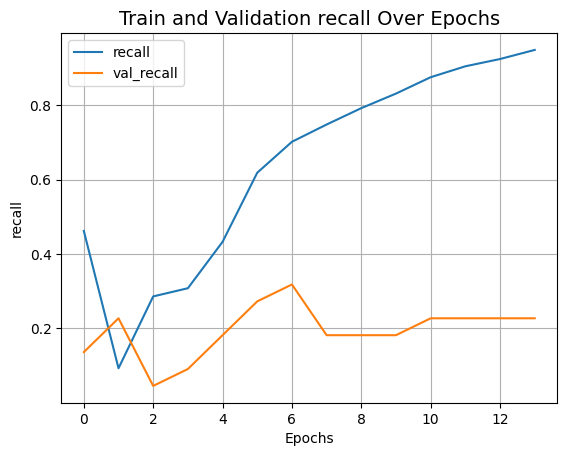

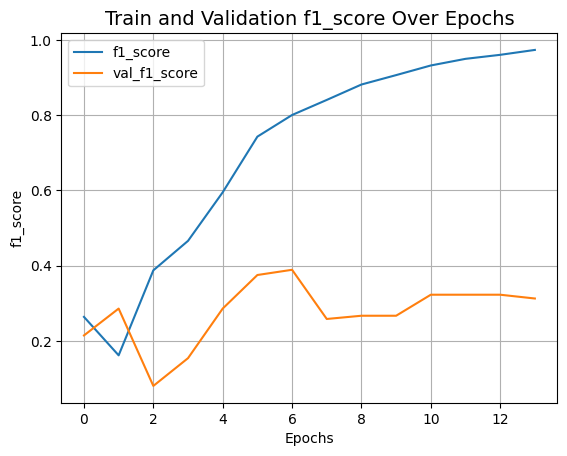

In [151]:
from tensorflow.keras import metrics

class F1Score(metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = metrics.Precision()
        self.recall = metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + keras.backend.epsilon()))

epochs = 14

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "binary_accuracy",
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        F1Score()
    ]
)

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs
)

def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

plot_result("loss")
plot_result("binary_accuracy")
plot_result("precision")
plot_result("recall")
plot_result("f1_score")


1/1 [==============================] - 0s 58ms/step
labels: [0. 1. 0. 0. 0. 0. 0. 0.]
labels: [0. 0. 0. 1. 1. 0. 0. 0.]
labels: [0. 1. 0. 0. 0. 0. 1. 0.]
labels: [0. 1. 0. 0. 0. 0. 0. 0.]
labels: [0. 1. 0. 1. 1. 0. 0. 0.]
labels: [0. 0. 1. 0. 0. 0. 0. 0.]
labels: [0. 1. 0. 0. 0. 0. 0. 0.]
labels: [0. 0. 1. 0. 0. 0. 0. 0.]
labels: [0. 0. 1. 0. 0. 0. 0. 0.]
labels: [0. 0. 0. 1. 1. 0. 0. 0.]
labels: [0. 0. 1. 0. 0. 0. 0. 0.]
labels: [0. 0. 1. 0. 0. 0. 0. 0.]
labels: [0. 0. 1. 0. 0. 0. 0. 0.]
labels: [0. 0. 0. 0. 0. 0. 0. 1.]
labels: [0. 0. 0. 1. 1. 0. 0. 0.]
labels: [0. 0. 1. 0. 0. 0. 0. 0.]
labels: [0. 0. 1. 0. 0. 0. 0. 0.]


2023-05-14 16:53:49.741102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype int64
	 [[{{node Placeholder/_7}}]]
2023-05-14 16:53:49.741454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype int64
	 [[{{node Placeholder/_7}}]]


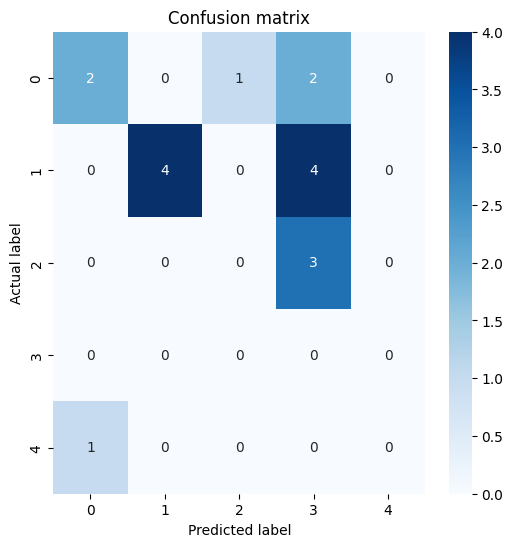

1/1 [==============================] - 0s 60ms/step - loss: 0.3668 - binary_accuracy: 0.8750 - precision: 0.8000 - recall: 0.3478 - f1_score: 0.4848
Loss on the test set: 0.3668409585952759
Binary accuracy on the test set: 87.5%.
Precision on the test set: 80.0%.
Recall on the test set: 34.78%.
F1 score on the test set: 48.48%.


In [164]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extract labels and predictions
y_pred = np.argmax(shallow_mlp_model.predict(test_dataset), axis=1)

y_true = []
for _, labels in test_dataset.unbatch().as_numpy_iterator():
    print("labels:", labels)
    y_true.append(np.argmax(labels))

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Existing evaluation metrics code
evaluation_metrics = shallow_mlp_model.evaluate(test_dataset)
loss, binary_acc, precision, recall, f1_score = evaluation_metrics

print(f"Loss on the test set: {loss}")
print(f"Binary accuracy on the test set: {round(binary_acc * 100, 2)}%.")
print(f"Precision on the test set: {round(precision * 100, 2)}%.")
print(f"Recall on the test set: {round(recall * 100, 2)}%.")
print(f"F1 score on the test set: {round(f1_score * 100, 2)}%.")


In [165]:
print(y_pred, y_true)

[4 4 1 1 3 2 4 4 4 4 2 2 4 1 4 4 2] [1, 3, 1, 1, 1, 2, 1, 2, 2, 3, 2, 2, 2, 7, 3, 2, 2]


In [159]:
from collections import Counter

# Initialize an empty Counter
category_counts = Counter()

# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    # Get the categories for this row
    categories = row["category"]

    # Increment the count for each category
    for category in categories:
        category_counts[category] += 1

# Print the results
for category, count in category_counts.items():
    print(f"{category}: {count} sentences")


Land use: 105 sentences
Local identity: 67 sentences
Future of work: 45 sentences
other: 88 sentences
Environment: 70 sentences
climate resilience: 70 sentences
Mobility (transport): 9 sentences


In [154]:
import numpy as np

# Lists to store the true and predicted labels
y_true = []
y_pred = []

# Iterate over the test dataset
for text_batch, label_batch in test_dataset:
    # Make predictions for this batch
    predictions = shallow_mlp_model.predict(text_batch)

    # Convert the predictions to label indices
    predictions = np.argmax(predictions, axis=1)

    # Get the true label indices
    true_labels = np.argmax(label_batch, axis=1)

    # Add the true and predicted labels to the lists
    y_true.extend(true_labels)
    y_pred.extend(predictions)


1/1 [==============================] - 1s 690ms/step


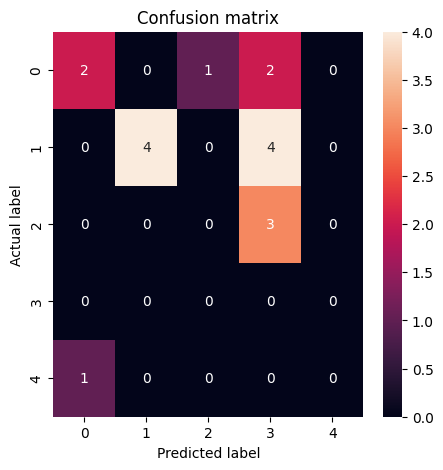

In [157]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
